# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda1">Exploratory Data Analysis : Research Question1</a></li>
<li><a href="#eda2">Exploratory Data Analysis : Research Question2</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected is the TMDb dataset that contains the data on movies and ratings.

> Trends to be explored here are:
- Choices of different Genres over the years
- Runtime over the years
- Revenue over the years

> Associations and Effects [over period spans] to be evaluated are:
- Revenue vs Popularity
- Revenue vs Vote Counts

> The investigations conducted here are exploratory and any associations will be tentative at best, as only visualization and basic correlations are attempted in this project. Any relation inferred will be used only as a pointer for conducting further detailed, statistically backed analyses. 

> The three variables investigated here are:
- using single-variable (1d) explorations: Genres, runtime, revenue over time
- multiple-variable (2d) explorations: Revenue over time for the factors Popularity and Vote counts.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white')

<a id='wrangling'></a>
## Data Wrangling
Reading the dataset in Pandas and if required its cleaning and sampling for analysis purpose will be carried out in this section

### General Properties

In [2]:
# Reading the CSV file of the dataset into Pandas dataframe
df_tmdb = pd.read_csv('./tmdb-movies.csv')

In [3]:
df_tmdb.head(3) # Printing the first three line of the dataset for checking

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
df_tmdb.dtypes # Checking for any datatype inconsistensies in the database

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date']) # Changing the release_date column to datetime format

In [6]:
df_tmdb.info() # Checking for any missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj       

In [7]:
df_tmdb_cleaned = df_tmdb.dropna().copy() # Dropping all missing values in any rows of the dataset, 
                                   # making the dataset suitable for further analysis.

In [8]:
sum(df_tmdb_cleaned.duplicated()) # Checking for any duplicate values in the database

0

In [9]:
df_tmdb_cleaned.shape # Checking for the shape of the database after cleaning.

(1992, 21)

<a id='eda1'></a>
## Exploratory Data Analysis

### Research Question 1 
##### How are genre, runtimes and revenues trending over time?
- For convenience of reading, the process of analysis and observations about each variable is given separately. 
<ul>
<li><a href="#genre">Genre</a></li>
<li><a href="#revenue">Revenue</a></li>
<li><a href="#runtime">Runtime</a></li>
</ul>


<a id='genre'></a>
### Genre:
- We determine to see how the choices of Genres has varied over time.
- Accordingly, we use a bar plot to observe the popularity of the genres over time

#### Trimming data for answering the question "How the choices of Genres has varied over time?"

In [10]:
genres_all_list = [] # Balnk list

In [11]:
# This loop will populate the "genres_all_list" with names from the dataframe column "genres" after splitting at "|"
for x in df_tmdb_cleaned.genres:
    genres_all_list.extend(x.split('|'))

In [12]:
unique_genres = pd.unique(genres_all_list) # Contains unique names of all genres mentioned in the dataframe df_tmdb_cleaned

In [13]:
# Generates a numpy zeros matrix with number of rows = len(df_tmdb_cleaned) and number of columns = len(unique_genres)
genres_matrix =  np.zeros((len(df_tmdb_cleaned), len(unique_genres)))

In [14]:
# Convert the np matrix to pandas dataframe with each column representing a genres
df_gen_category = pd.DataFrame(genres_matrix, columns = unique_genres)

In [15]:
# This will populate the df_gen_category matrix row wise with each genres encountered per year while enumerating through loop
for i, name in enumerate(df_tmdb_cleaned.genres):
    index = df_gen_category.columns.get_indexer(name.split('|'))
    df_gen_category.iloc[i,index] = 1

In [16]:
# Adding a prefix "Gen", short for Genres before each existinig genres category. It will later help in merging
df_gen_category = df_gen_category.add_prefix('Gen_')

In [17]:
# Joining the df_tmdb_cleaned and df_gen_category dataframes to form a new one. It is done to modify the dataframe sbsequently
# for analysis purpose
df_tmdb_cleaned = df_tmdb_cleaned.reset_index(drop=True)
df_gen_category = df_gen_category.reset_index(drop=True)
df_tmdb_new = df_tmdb_cleaned.join(df_gen_category)

In [18]:
# Dropping the existing genres column which have each genres separated by"|". We don't require it anymore has we have
# separate genre classification now.
df_tmdb_new.drop('genres', axis =1, inplace=True)

In [19]:
# grouping by release year to get each genre count per year
df_genres_years = df_tmdb_new.groupby('release_year')['Gen_Action', 'Gen_Adventure', 'Gen_Science Fiction', 'Gen_Thriller', 'Gen_Fantasy', 'Gen_Crime', 'Gen_Western', 'Gen_Drama', 'Gen_Family', 'Gen_Animation', 'Gen_Comedy', 'Gen_Mystery', 'Gen_War', 'Gen_Romance', 'Gen_History', 'Gen_Horror', 'Gen_Music', 'Gen_Documentary', 'Gen_TV Movie', 'Gen_Foreign'].sum()

In [20]:
# Here we will pivot the earlier dataframe, so that it gives the count of each genres row wise for each individual year
df_genres_years = df_genres_years.stack(dropna=False).rename_axis(['a','b']).reset_index(name='c')

In [21]:
# Converting column "c" to int. it was earlier float
df_genres_years['c'] = df_genres_years['c'].astype(int)

In [22]:
# Renaming the column labels
df_genres_years.rename(index=str, columns={"a":"Year","b":"Genre","c":"Movies_Made"},inplace=True)

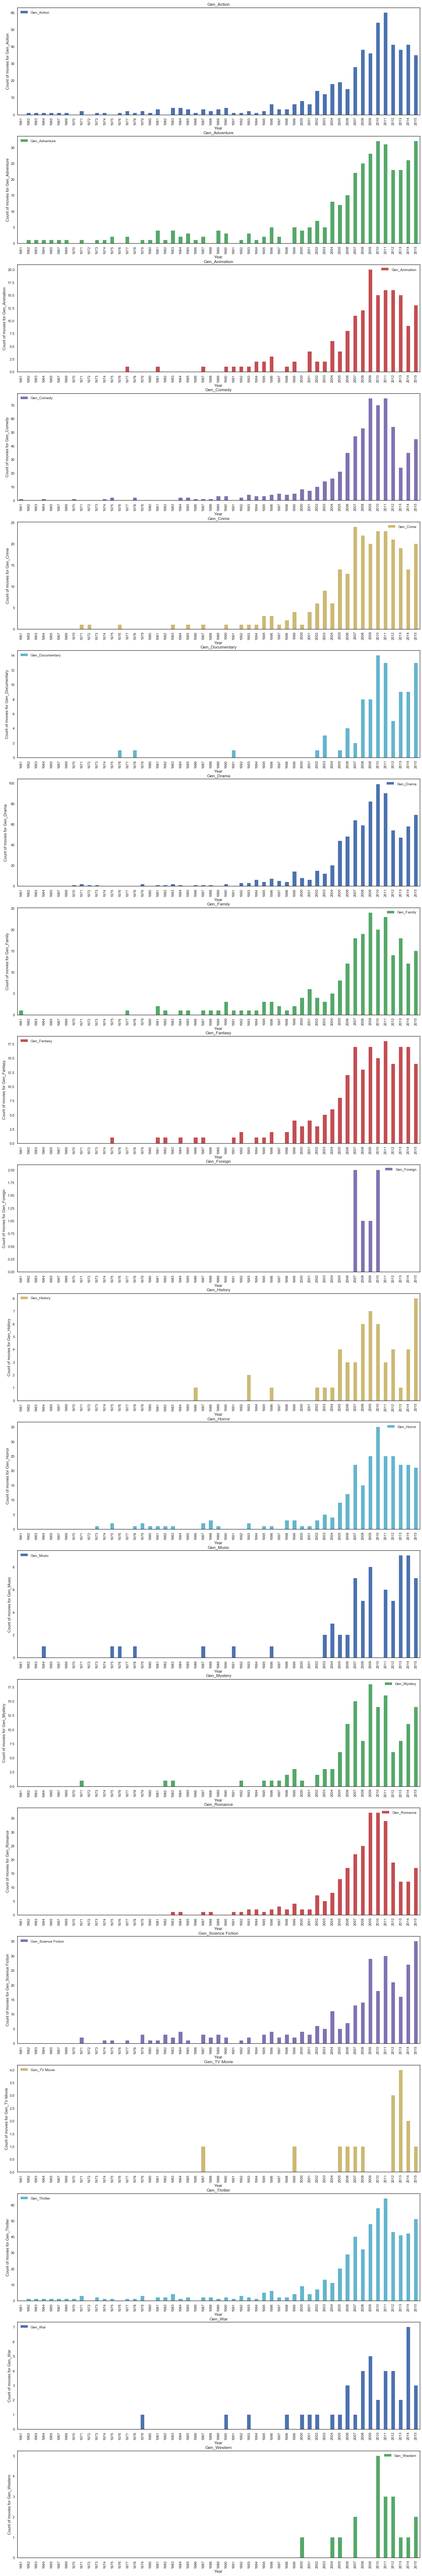

In [23]:
# Plotting via pivot table
axes = df_genres_years.pivot_table(index='Year', columns='Genre', values='Movies_Made').plot(kind='bar', subplots=True, sharex =False, figsize=(20,130))
axes[0].set_ylabel('Count of movies for Gen_Action')
axes[1].set_ylabel('Count of movies for Gen_Adventure')
axes[2].set_ylabel('Count of movies for Gen_Animation')
axes[3].set_ylabel('Count of movies for Gen_Comedy')
axes[4].set_ylabel('Count of movies for Gen_Crime')
axes[5].set_ylabel('Count of movies for Gen_Documentary')
axes[6].set_ylabel('Count of movies for Gen_Drama')
axes[7].set_ylabel('Count of movies for Gen_Family')
axes[8].set_ylabel('Count of movies for Gen_Fantasy')
axes[9].set_ylabel('Count of movies for Gen_Foreign')
axes[10].set_ylabel('Count of movies for Gen_History')
axes[11].set_ylabel('Count of movies for Gen_Horror')
axes[12].set_ylabel('Count of movies for Gen_Music')
axes[13].set_ylabel('Count of movies for Gen_Mystery')
axes[14].set_ylabel('Count of movies for Gen_Romance')
axes[15].set_ylabel('Count of movies for Gen_Science Fiction')
axes[16].set_ylabel('Count of movies for Gen_TV Movie')
axes[17].set_ylabel('Count of movies for Gen_Thriller')
axes[18].set_ylabel('Count of movies for Gen_War')
axes[19].set_ylabel('Count of movies for Gen_Western')

### Observations of Genres:
From the plots and histogram, we can see that:
- Choices of Genres has varied widely over time.
- As seen in the plots maximum no. of movies for overall genre was made between the period 2009-2011. After that it saw a decline. The reason for that needs more evaluation.

<a id='revenue'></a>

### Revenue:
- We wish to determine if over the years, what is the likely trend of revenue a movie will generate
- Accordingly, we use a histogram to observe the counts of revenues from our dataset
- Maximum counts will reflect the typical revenue earned by movies

In [24]:
df_groupby_year = df_tmdb_cleaned.groupby('release_year').mean()

In [25]:
df_groupby_year['revenue'].describe()

count    5.300000e+01
mean     1.303569e+08
std      7.902672e+07
min      0.000000e+00
25%      8.538829e+07
50%      1.216781e+08
75%      1.699437e+08
max      3.202789e+08
Name: revenue, dtype: float64

In [26]:
# Setting the plot size of subsequent plots
plt.rcParams['figure.figsize'] = (20.0, 10.0)

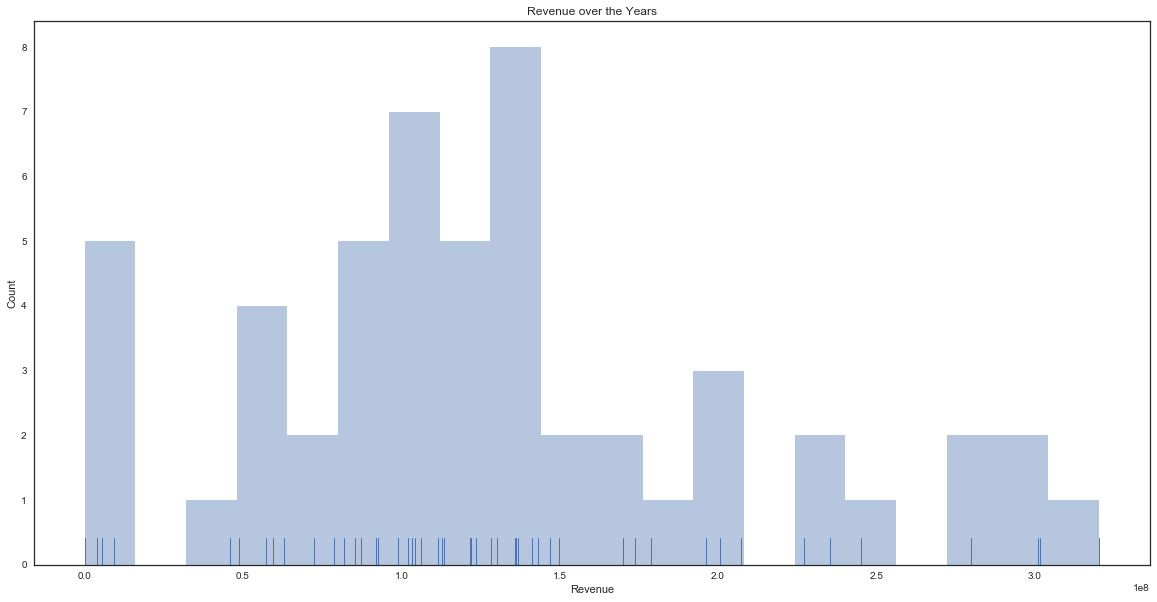

In [27]:
x = df_groupby_year['revenue']
fig = sns.distplot(x, bins=20, kde=False, rug=True);
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.title("Revenue over the Years")
plt.show(fig)

### Observations of Revenues:
From the plots and histogram, we can see that:
- As seen in the plots and functions above, the distribution is right skewed.
- Revenues vary widely but the maximum of it falls between 1.21e+08 to 1.69e+08.

<a id='runtime'></a>
### Runtime:
- We wish to determine if over the years, there is popular movie running duration
- Accordingly, we use a histogram to observe the counts of movie runtimes from our new dataset
- Maximum counts will reflect the duration that most movies run

In [28]:
df_groupby_year['runtime'].describe()

count     53.000000
mean     111.217673
std       13.402815
min       92.250000
25%      104.567961
50%      109.000000
75%      115.000000
max      175.000000
Name: runtime, dtype: float64

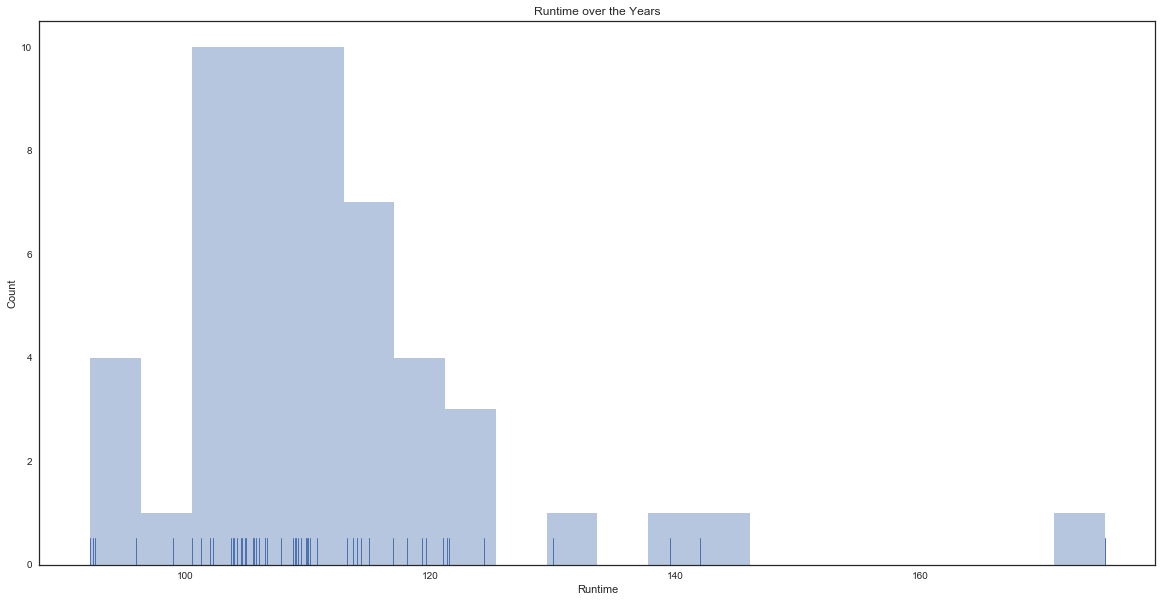

In [29]:
x = df_groupby_year['runtime']
fig = sns.distplot(x, bins=20, kde=False, rug=True);
plt.xlabel("Runtime")
plt.ylabel("Count")
plt.title("Runtime over the Years")
plt.show(fig)

### Observations about Runtimes:
- As seen in the plots and functions above, the distribution is right skewed.
- Maximum runtime of movies fell in the 109-117 range.

<a id='eda2'></a>

## Exploratory Data Analysis

### Research Question 2
#### What variables are associated with the revenues of movies spanning the years?
Steps:
- To answer this question,we view the correlation of variables from our dataset grouped over the years.
- Here, we visualize the relations between variables using pairplots to view the associations [if any]. 
- We will use scatterplots/jointplots to visualize individual relation of interest.
- Below are observations on :
<ul>
<li><a href="#rev_pop">Revenue vs Popularity</a></li>
<li><a href="#rev_va">Revenue vs Vote Count</a></li>
</ul>

### Revenue vs Other parameters:

#### Here, we will see how revenue is co-related to other parameters over the years.

In [30]:
df_groupby_year.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
id,1.000000,0.094003,0.234187,0.005546,-0.187814,0.040513,-0.239510,-0.056956,-0.159920
popularity,0.094003,1.000000,-0.135789,0.638144,0.496033,0.825865,0.560286,0.108242,0.722086
budget,0.234187,-0.135789,1.000000,0.301355,0.022499,0.116308,-0.442830,0.717598,-0.336659
revenue,0.005546,0.638144,0.301355,1.000000,0.352162,0.692556,0.341200,0.483729,0.658027
runtime,-0.187814,0.496033,0.022499,0.352162,1.000000,0.569123,0.377352,0.389721,0.518711
vote_count,0.040513,0.825865,0.116308,0.692556,0.569123,1.000000,0.575930,0.206812,0.545079
vote_average,-0.239510,0.560286,-0.442830,0.341200,0.377352,0.575930,1.000000,-0.239151,0.510532
budget_adj,-0.056956,0.108242,0.717598,0.483729,0.389721,0.206812,-0.239151,1.000000,0.158450
revenue_adj,-0.159920,0.722086,-0.336659,0.658027,0.518711,0.545079,0.510532,0.158450,1.000000


#### Here, we will plot how revenue is related to other parameters over the years using a pairplot.

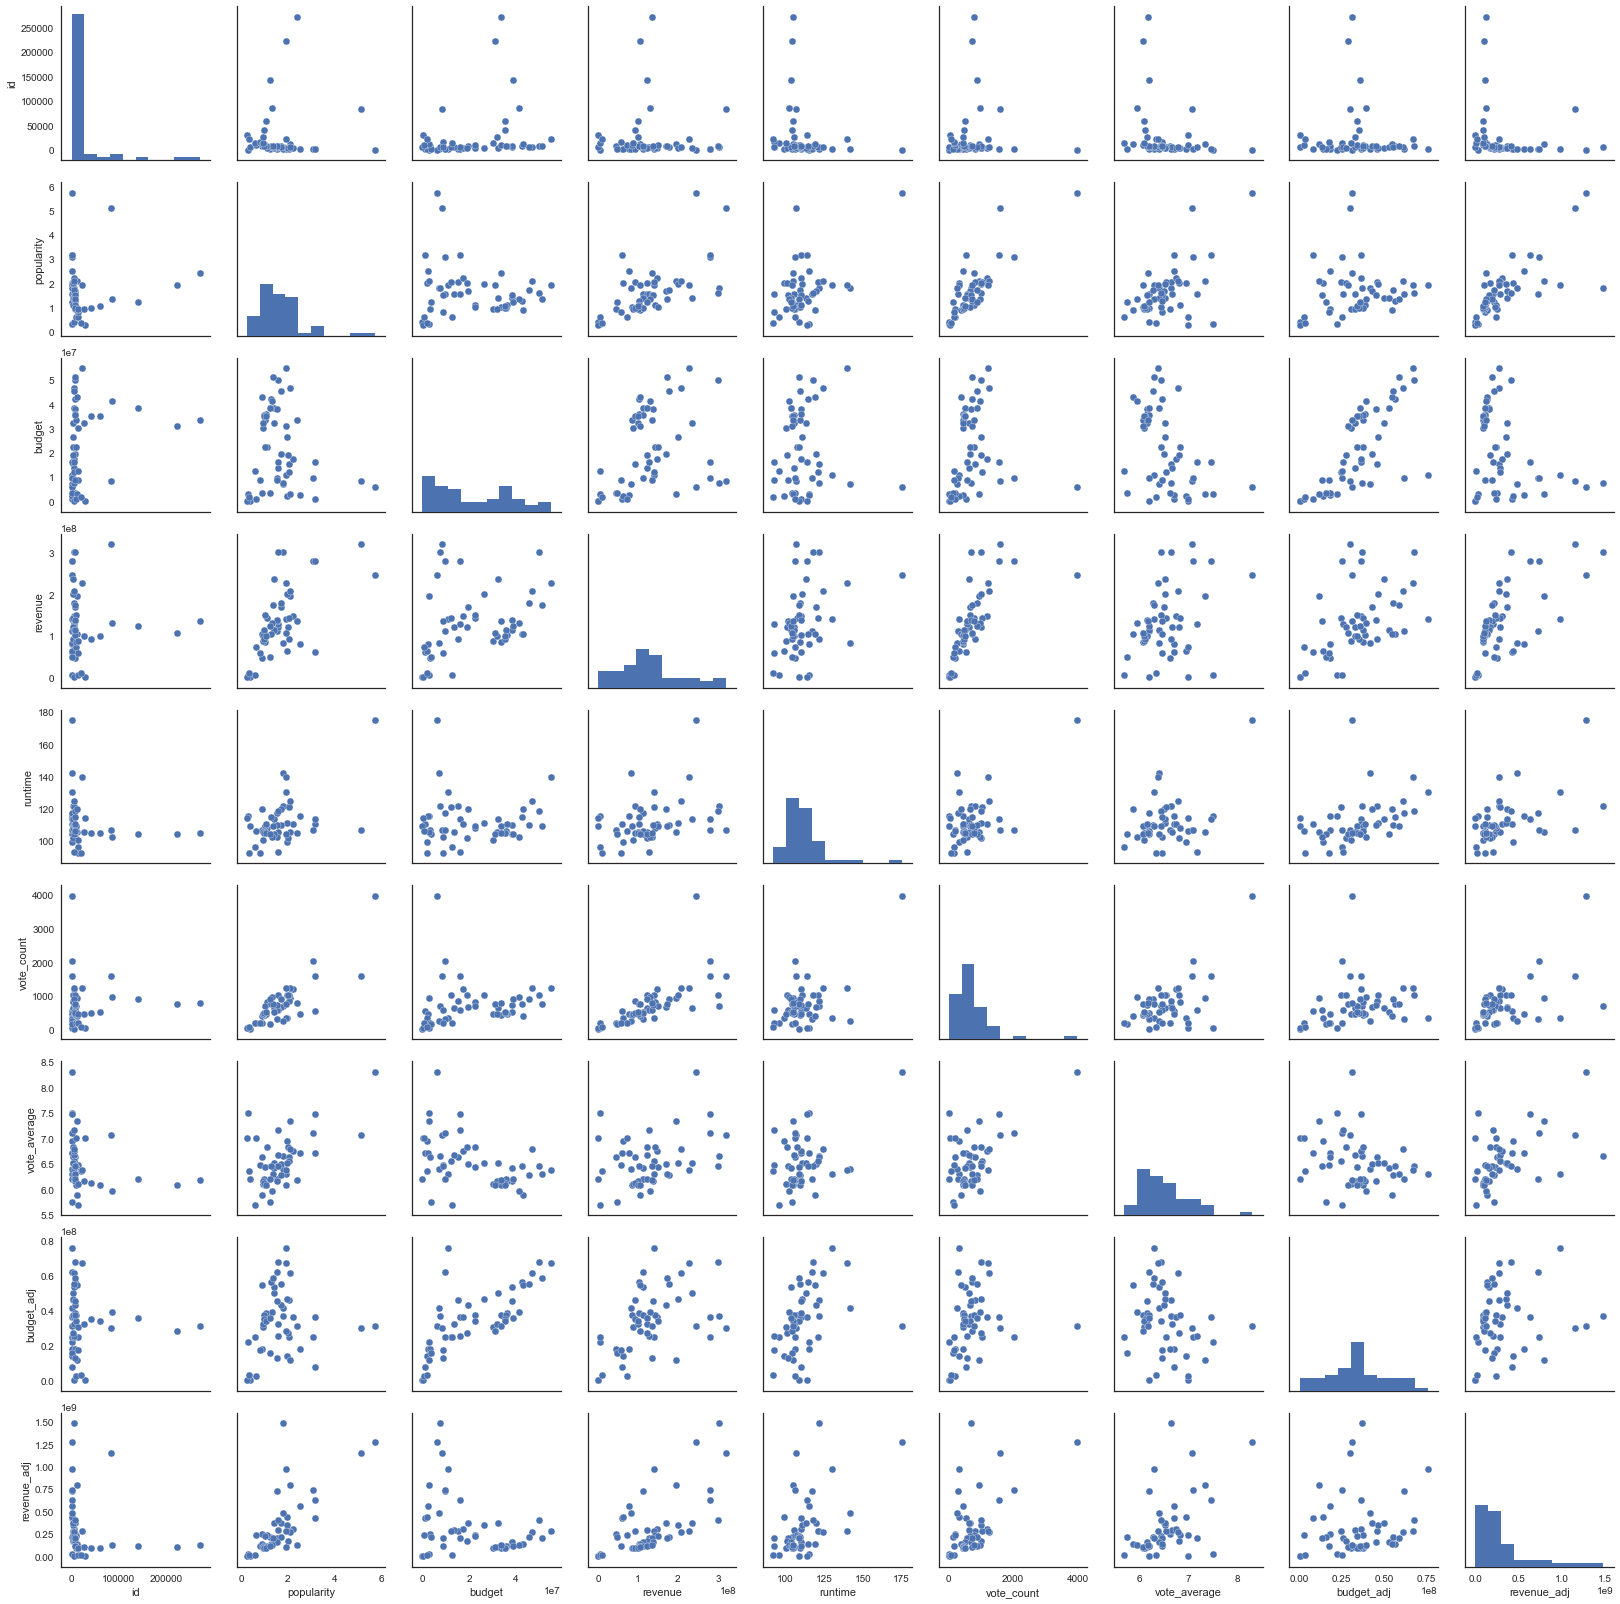

In [31]:
sns.pairplot(data=df_groupby_year);

<a id='rev_pop'></a>

### Revenue vs Popularity:
Here, we view just how popularity and revenue are related using a jointplot.

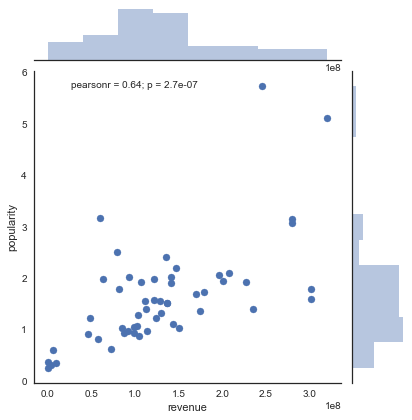

In [32]:
sns.jointplot(x="revenue", y="popularity", data=df_groupby_year);

#### Observations- Revenue vs Popularity:
- The correlation computed from function is evident in the scatterplot. 
- The few outliers that are rated extremely high need to be looked into.

<a id='rev_vc'></a>

### Revenue vs Vote counts:
Here, we view how vote counts and revenue are related using a jointplot.

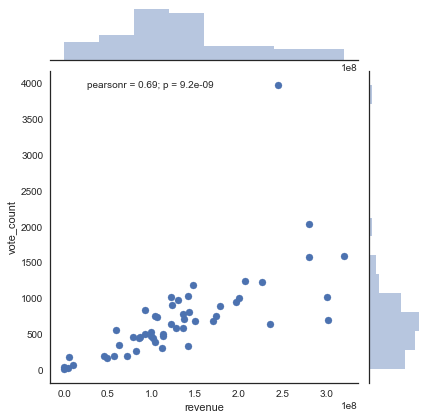

In [33]:
sns.jointplot(x="revenue", y="vote_count", data=df_groupby_year);

#### Observations- Revenue vs Vote Count:
- The correlation computed from function is evident in the scatterplot. 
- Vote count is roughly proportional to revenues. 

<a id='limitations'></a>
## Limitations:
- In the above analysis, we have worked with popularity, vote count and revenues. 
- We restrict ourselves to only numerical values of revenues. Any variances in currencies, like dollars, rupees, Euros, etc. are not considered. 
- In case of varying currencies [which is likely since the movies range from different regions], exchange rates or conversions or some sort of normalization would need to be applied.
- We also do not consider different revenue sources like movies ticket sales, audio rights sales, digital sales, braodcast sales, etc. and disregard the period and markets over which the revenues are collected. Older movies that are cast over television or re-released and might garner higher revenues are examples of limitations of the dataset and hence, this EDA. 
- Vote counts are taken at face value. We are not inspecting the nature of votes, good or bad or any other range of values. Also, the period or channels in which these vote counts were gathered is not considered and will be significant if varying for different movies. 
- The medium through which popularity was determined is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values too. 
- This analysis assumes that the same index and methods were employed for collecting popularity factors and counting votes for all movies. In the event that it is not so, the results might not hold true. [a possibility since movies are from different countries and languages]
- While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.

<a id='conclusions'></a>
## Conclusions

- From our EDA, we discovered that over the years, there are patterns to popularity, vote count and revenues. 
- Chices of Genres showed a wider range, but the maximum no.of movies were made between the period of 2009 to 2011 overall.
- Revenues showed a wider range, but the most likely range was 1.21e+08 to 1.69e+08.
- While only tentative, we found that popular runtimes range between 109 and 117 minutes.
- We also analyzed multiple variables. Specifically, we chose to analyze over time [release_year], the effect of particular    variables [popularity and vote count] on our factor of interest [revenue].
- Based on this analysis, we found that over the years, popularity and revenue are related positively. 
- Also, Vote counts and revenue are related positively.
- However, these relations are merely correlations and do not imply causation.
- These lines of analysis point us to the need for further investigation, especially with regards to popularity.